In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
font = {'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

Matplotlib is building the font cache; this may take a moment.


## 구글스프레드시트에서 읽어오기

In [3]:
import gspread
import pandas as pd
from oauth2client.service_account import ServiceAccountCredentials

scope = [
    'https://spreadsheets.google.com/feeds',
    'https://www.googleapis.com/auth/drive',
]

json_file_name = 'C://Users/user/fundamental/files/weekly-house-db-ac0a43b61ddd.json'

credentials = ServiceAccountCredentials.from_json_keyfile_name(json_file_name, scope)
gc = gspread.authorize(credentials)

spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1cr50NkztlYeTCMkmqkeq16Va-99yT3Hs-Rbl2TGOp1U/edit#gid=0'

#지수
doc = gc.open_by_url(spreadsheet_url)
m_d = doc.worksheet('mae')
j_d = doc.worksheet('jeon')
basic_city = doc.worksheet('city')
kb_m = doc.worksheet('kbm')
kb_j = doc.worksheet('kbj')

#데이터 프레임으로 읽기
basic_values = basic_city.get_all_values()
m_values = m_d.get_all_values()
j_values = j_d.get_all_values()
kbm_values = kb_m.get_all_values()
kbj_values = kb_j.get_all_values()

basic_header, basic_rows = basic_values[0], basic_values[1:]
m_header, m_rows = m_values[1], m_values[2:]
j_header, j_rows = j_values[1], j_values[2:]
kbm_header, kbm_rows = kbm_values[1], kbm_values[2:]
kbj_header, kbj_rows = kbj_values[1], kbj_values[2:]

basic_df= pd.DataFrame(basic_rows, columns=basic_header)
omdf = pd.DataFrame(m_rows, columns=m_header)
ojdf = pd.DataFrame(j_rows, columns=j_header)
mdf = pd.DataFrame(kbm_rows, columns=kbm_header)
jdf = pd.DataFrame(kbj_rows, columns=kbj_header)

basic_df

,code,지역,총인구수,세대수,면적,x,y,광역시도,행정구역,short,full
0,28110,인천광역시 중구,"147,093","72,990","140,000,000",0,4,인천광역시,중구,인천 중구,인천 중구
1,28140,인천광역시 동구,"59,322","27,783","7,194,831",0,3,인천광역시,동구,인천 동구,인천 동구
2,28185,인천광역시 연수구,"387,789","156,685","54,947,866",0,5,인천광역시,연수구,인천 연수구,인천 연수구
3,28260,인천광역시 서구,"569,494","239,984","117,000,000",0,2,인천광역시,서구,인천 서구,인천 서구
4,28710,인천광역시 강화군,"69,940","35,058","411,000,000",0,1,인천광역시,강화군,인천 강화군,인천 강화군
...,...,...,...,...,...,...,...,...,...,...,...
285,48252,경상남도 장유출장소,0,0,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,경남 장유출장소
286,48330,경상남도 양산시,"353,939","154,571","486,000,000",#N/A,#N/A,#N/A,#N/A,양산,경남 양산시
287,48332,경상남도 양산시웅상출장소,0,0,#N/A,#N/A,#N/A,#N/A,#N/A,#N/A,경남 양산시웅상출장소
288,48730,경상남도 함안군,"62,078","30,960","417,000,000",#N/A,#N/A,#N/A,#N/A,함안,경남 함안군


In [4]:
jdf

,날짜,전국,서울,서울 강북권역,서울 강북구,서울 광진구,서울 노원구,서울 도봉구,서울 동대문구,서울 마포구,...,창원 의창구,창원 진해구,양산,거제,진주,김해,통영,제주도,제주,지방
0,2008. 4. 7,50.6002,45.68255,46.84284,44.47346,44.74558,45.86511,48.87962,48.84929,40.37477,...,85.82594,58.09324,49.50644,66.77907,83.45894,48.92971,105.70591,,52.88673,58.61672
1,2008. 4. 14,50.64001,45.71676,46.89422,44.5629,44.71863,45.93056,48.99318,48.91603,40.37477,...,85.82594,58.09324,49.49341,67.00085,83.37943,49.0541,105.70591,,52.88845,58.65298
2,2008. 4. 21,50.66613,45.73803,46.92532,44.65985,44.72506,45.95672,49.0052,48.96679,40.37284,...,85.82594,58.09324,49.49341,67.33128,83.26038,49.10823,105.70591,,52.8893,58.67928
3,2008. 4. 28,50.69826,45.7612,46.94208,44.68319,44.75491,45.98117,48.99938,48.97214,40.39062,...,85.82594,57.98931,49.48322,67.65011,83.16438,49.131,105.70591,,52.8893,58.71385
4,2008. 5. 5,50.73431,45.78394,46.98414,44.7577,44.76991,45.97975,49.0141,49.05583,40.42464,...,85.82594,57.98931,49.48322,67.86815,83.16438,49.131,105.70591,,52.8893,58.74852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2023-09-11,87.778,84.912,85.139,85.502,85.033,85.208,84.396,82.778,86.41,...,93.579,103.916,90.248,94.087,99.107,91.238,101.128,0,96.142,96.296
778,2023-09-18,87.833,85.012,85.187,85.599,85.194,85.191,84.513,82.863,86.604,...,93.759,103.888,90.344,93.9,99.127,90.872,101.128,0,96.086,96.293
779,2023-09-25,87.885,85.12,85.263,85.684,85.511,85.199,84.523,82.884,86.832,...,93.97,103.878,90.264,93.703,99.195,90.84,101.128,0,96.086,96.301
780,2023-10-09,87.952,85.237,85.345,85.706,85.703,85.252,84.568,82.923,86.966,...,94.085,103.666,90.248,93.541,99.507,90.752,101.128,0,96.086,96.345


In [5]:
mdf = mdf.set_index(keys='날짜')
mdf.index = pd.to_datetime(mdf.index)
mdf = mdf.apply(lambda x:x.replace('','0').replace('#DIV/0!','0').replace('#N/A','0'))

jdf = jdf.set_index(keys='날짜')
jdf.index = pd.to_datetime(jdf.index)
jdf = jdf.apply(lambda x:x.replace('','0').replace('#DIV/0!','0').replace('#N/A','0'))

mdf = mdf.astype(float).round(decimals=2)
jdf = jdf.astype(float).round(decimals=2)

omdf = omdf.set_index(keys='날짜')
omdf.index = pd.to_datetime(omdf.index)

ojdf = ojdf.set_index(keys='날짜')
ojdf.index = pd.to_datetime(ojdf.index)
omdf = omdf.apply(lambda x:x.replace('','0'))
ojdf = ojdf.apply(lambda x:x.replace('','0'))
omdf = omdf.astype(float).round(decimals=2)
ojdf = ojdf.astype(float).round(decimals=2)
ojdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 597 entries, 2012-05-07 to 2023-10-16
Columns: 235 entries, 전국 to 서귀포
dtypes: float64(235)
memory usage: 1.1 MB


In [6]:
basic_df = basic_df[basic_df['x'] != '#N/A' ]
basic_df.loc[:,'총인구수'] = basic_df['총인구수'].apply(lambda x: x.replace(',','').replace('-','0')).astype(int)
basic_df.loc[:,'세대수'] = basic_df['세대수'].apply(lambda x: x.replace(',','').replace('-','0')).astype(int)
basic_df.loc[:,'면적'] = basic_df['면적'].apply(lambda x: x.replace(',','').replace('#N/A','0')).astype(float)
basic_df['x'] = basic_df['x'].astype(int)
basic_df['y'] = basic_df['y'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_12600\3774031662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic_df.loc[:,'총인구수'] = basic_df['총인구수'].apply(lambda x: x.replace(',','').replace('-','0')).astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_12600\3774031662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic_df.loc[:,'세대수'] = basic_df['세대수'].apply(lambda x: x.replace(',','').replace('-','0')).astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_12600\3774031662.py:4: SettingWithC

### KB 

In [7]:
import numpy as np
 #주간 증감률

# mdf = index_list[0]
# jdf = index_list[1]
mdf_change = mdf.pct_change()*100
mdf_change = mdf_change.iloc[1:]
mdf_change.replace([np.inf, -np.inf], np.nan, inplace=True)
mdf_change = mdf_change.astype(float).fillna(0)
jdf_change = jdf.pct_change()*100
jdf_change = jdf_change.iloc[1:]
jdf_change.replace([np.inf, -np.inf], np.nan, inplace=True)
jdf_change = jdf_change.astype(float).fillna(0)
mdf_change

,전국,서울,서울 강북권역,서울 강북구,서울 광진구,서울 노원구,서울 도봉구,서울 동대문구,서울 마포구,서울 서대문구,...,창원 의창구,창원 진해구,양산,거제,진주,김해,통영,제주도,제주,지방
날짜,,,,,,,,,,,,,,,,,,,,,
2008-04-14,0.137931,0.234388,0.401741,0.440875,0.015881,0.667629,0.757942,0.165975,0.109111,0.131622,...,0.000000,0.000000,0.018285,0.233615,-0.147292,0.163726,0.000000,0.0,0.000000,0.048100
2008-04-21,0.189394,0.267246,0.450150,0.360558,0.174659,0.645277,0.688220,0.298260,0.108992,0.279330,...,0.000000,0.000000,0.000000,0.388450,0.000000,0.036324,0.000000,0.0,0.061312,0.080128
2008-04-28,0.137481,0.216558,0.331950,0.249922,0.079252,0.516474,0.445080,0.033041,0.108873,0.213010,...,0.000000,-0.015175,0.182815,0.490133,-0.090775,0.127088,0.000000,0.0,0.000000,0.080064
2008-05-05,0.137292,0.182846,0.297767,0.420692,0.031676,0.531538,0.189903,0.247729,0.181258,0.277959,...,0.000000,0.000000,0.000000,0.089847,0.000000,0.018132,0.000000,0.0,0.040850,0.032000
2008-05-12,0.119966,0.182512,0.280389,0.729247,0.079164,0.317237,0.284315,0.230643,0.072372,0.489157,...,0.000000,0.000000,0.091241,0.371890,-0.034072,0.126904,0.000000,0.0,0.122499,0.079974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-11,0.033311,0.077340,0.022589,0.033814,0.010685,0.000000,-0.023901,0.034380,0.096972,0.045305,...,0.178759,-0.009998,-0.166806,0.000000,0.119964,-0.054183,-0.009987,0.0,0.000000,0.000000
2023-09-18,0.022200,0.066240,0.045167,0.101408,0.117521,-0.023602,0.000000,0.137473,0.150700,0.045285,...,0.167944,-0.109989,0.010443,-0.043403,0.079880,-0.065055,0.000000,0.0,0.020178,-0.010365
2023-09-25,0.033293,0.044131,0.000000,0.000000,0.085370,0.000000,-0.035859,0.034321,0.010748,0.011316,...,0.010479,-0.010010,0.010442,0.000000,0.129702,0.000000,-0.009988,0.0,0.000000,0.031098


In [8]:
#일주일 간 상승률 순위
last_df = mdf_change.iloc[-1].T.to_frame()
last_df['전세증감'] = jdf_change.iloc[-1].T.to_frame()
last_df.columns = ['매매증감', '전세증감']
last_df.dropna(inplace=True)
last_df = last_df.astype(float).fillna(0).round(decimals=2)
last_df = last_df.reset_index()
last_df = last_df.sort_values(by='매매증감', ascending=False, ignore_index=True)
last_df

,index,매매증감,전세증감
0,과천,0.29,0.53
1,하남,0.25,0.57
2,용인 수지구,0.19,0.39
3,서울 용산구,0.19,0.58
4,서울 양천구,0.18,0.19
...,...,...,...
181,당진,-0.15,-0.10
182,울산 동구,-0.15,-0.17
183,부산 동구,-0.16,-0.01
184,동두천,-0.17,-0.14


In [9]:
df = pd.merge(last_df, basic_df, how='inner', left_on='index', right_on='short')
df

,index,매매증감,전세증감,code,지역,총인구수,세대수,면적,x,y,광역시도,행정구역,short,full
0,과천,0.29,0.53,41290,경기도 과천시,78414,29103,35868319.0,7,7,경기도,과천시,과천,경기 과천시
1,하남,0.25,0.57,41450,경기도 하남시,323675,140012,92991186.0,9,5,경기도,하남시,하남,경기 하남시
2,용인 수지구,0.19,0.39,41465,경기도 용인시 수지구,375264,141176,42100000.0,7,8,용인시,수지구,용인 수지구,경기 용인시 수지구
3,서울 용산구,0.19,0.58,11170,서울특별시 용산구,222083,111508,21866384.0,6,5,서울특별시,용산구,서울 용산구,서울 용산구
4,서울 양천구,0.18,0.19,11470,서울특별시 양천구,444925,181921,17405710.0,4,3,서울특별시,양천구,서울 양천구,서울 양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,당진,-0.15,-0.10,44270,충청남도 당진시,166928,79987,705000000.0,1,10,충청남도,당진시,당진,충남 당진시
174,울산 동구,-0.15,-0.17,31170,울산광역시 동구,152971,66449,36074686.0,12,14,울산광역시,동구,울산 동구,울산 동구
175,부산 동구,-0.16,-0.01,26170,부산광역시 동구,88222,47024,9865235.0,10,17,부산광역시,동구,부산 동구,부산 동구
176,동두천,-0.17,-0.14,41250,경기도 동두천시,93189,44481,95664308.0,4,0,경기도,동두천시,동두천,경기 동두천시


### 부동산원

In [10]:
import numpy as np

# omdf = index_list[2]
# ojdf = index_list[3]
#주간 증감률
omdf_change = omdf.pct_change()*100
omdf_change = omdf_change.iloc[1:]
omdf_change.replace([np.inf, -np.inf], np.nan, inplace=True)
omdf_change = omdf_change.astype(float).fillna(0)
ojdf_change = ojdf.pct_change()*100
ojdf_change = ojdf_change.iloc[1:]
ojdf_change.replace([np.inf, -np.inf], np.nan, inplace=True)
ojdf_change = ojdf_change.astype(float).fillna(0)
omdf_change = omdf_change.round(decimals=6)
ojdf_change = ojdf_change.round(decimals=6)
omdf_change

,전국,수도권,지방,6대광역시,5대광역시,9개 도,8개 도,서울,서울 강북권역,서울 도심권,...,진주,통영,사천,김해,밀양,거제,양산,제주도,제주,서귀포
날짜,,,,,,,,,,,,,,,,,,,,,
2012-05-14,-0.085932,-0.248236,0.069501,-0.013236,0.039798,-0.046636,0.101585,-0.310868,-0.291191,-0.045362,...,-0.213436,0.000000,0.000000,0.035199,0.000000,-0.167861,-0.020809,-0.027724,0.000000,-0.126823
2012-05-21,-0.073719,-0.117878,-0.011575,-0.052952,-0.039783,-0.046658,0.010148,-0.149682,-0.097347,-0.204221,...,0.000000,0.000000,0.000000,-0.483814,0.000000,-0.045269,-0.353835,0.013866,0.000000,0.000000
2012-05-28,-0.061478,-0.144243,0.034730,0.000000,0.026532,-0.046680,0.040589,-0.187383,-0.182704,-0.159163,...,0.000000,0.000000,0.000000,0.106073,0.000000,-0.148810,-0.208877,0.000000,0.014278,0.000000
2012-06-04,-0.123031,-0.196980,-0.069436,-0.105960,-0.066313,-0.093403,-0.060858,-0.262829,-0.170836,-0.261899,...,0.000000,0.000000,0.000000,-0.194260,0.000000,-0.427655,-0.167452,-0.055455,-0.071378,0.000000
2012-06-11,-0.110865,-0.236842,0.011581,-0.079554,-0.053086,-0.058432,0.060895,-0.363910,-0.244469,-0.205503,...,0.000000,0.223774,0.000000,-0.106167,0.000000,-0.331880,-0.125799,-0.069358,-0.085714,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18,0.107388,0.162110,0.042694,0.044568,0.033621,0.126156,0.050839,0.117296,0.120946,0.169258,...,0.140252,-0.020429,0.000000,-0.032471,0.028758,-0.156180,0.042608,-0.019472,-0.009696,-0.019704
2023-09-25,0.064364,0.118688,0.032007,0.033411,0.022406,0.083998,0.030488,0.106508,0.076872,0.137290,...,0.110044,0.000000,-0.009997,-0.032482,0.009583,-0.145251,-0.063884,-0.029214,-0.029092,-0.019708
2023-10-02,0.085763,0.129324,0.021331,0.033400,0.022401,0.104910,0.030479,0.095755,0.098760,0.105463,...,0.039972,-0.020433,-0.029994,-0.021661,0.000000,-0.167842,0.010654,-0.019482,-0.029101,-0.019712


In [11]:
#일주일 간 상승률 순위
last_odf = omdf_change.iloc[-1].T.to_frame()
last_odf['전세증감'] = ojdf_change.iloc[-1].T.to_frame()
last_odf.columns = ['매매증감', '전세증감']
last_odf.dropna(inplace=True)
last_odf = last_odf.astype(float).fillna(0).round(decimals=2)
last_odf = last_odf.reset_index()
last_odf = last_odf.sort_values(by='매매증감', ascending=False, ignore_index=True)
last_odf

,index,매매증감,전세증감
0,안양 동안구,0.35,0.46
1,과천,0.35,0.27
2,하남,0.35,0.73
3,안산 단원구,0.34,0.55
4,화성,0.34,0.88
...,...,...,...
230,서산,-0.10,0.18
231,부산 부산진구,-0.13,0.01
232,인천 미추홀구,-0.14,-0.01
233,거제,-0.18,-0.16


In [12]:
odf = pd.merge(last_odf, basic_df, how='inner', left_on='index', right_on='short')
odf

,index,매매증감,전세증감,code,지역,총인구수,세대수,면적,x,y,광역시도,행정구역,short,full
0,안양 동안구,0.35,0.46,41173,경기도 안양시 동안구,314688,125005,21930000.0,6,7,경기도 안양시,동안구,안양 동안구,경기 안양시 동안구
1,과천,0.35,0.27,41290,경기도 과천시,78414,29103,35868319.0,7,7,경기도,과천시,과천,경기 과천시
2,하남,0.35,0.73,41450,경기도 하남시,323675,140012,92991186.0,9,5,경기도,하남시,하남,경기 하남시
3,안산 단원구,0.34,0.55,41273,경기도 안산시 단원구,300693,136189,91230000.0,2,5,안산시,단원구,안산 단원구,경기 안산시 단원구
4,화성,0.34,0.88,41590,경기도 화성시,894587,379119,698000000.0,5,9,경기도,화성시,화성,경기 화성시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,서산,-0.10,0.18,44210,충청남도 서산시,176407,81921,742000000.0,0,11,충청남도,서산시,서산,충남 서산시
197,부산 부산진구,-0.13,0.01,26230,부산광역시 부산진구,350977,174306,29666238.0,10,16,부산광역시,부산진구,부산 부산진구,부산 부산진구
198,인천 미추홀구,-0.14,-0.01,28177,인천광역시 미추홀구,407253,194998,24835030.0,1,4,인천광역시,미추홀구,인천 미추홀구,인천 미추홀구
199,거제,-0.18,-0.16,48310,경상남도 거제시,238822,103590,403000000.0,9,20,경상남도,거제시,거제,경남 거제시


## 그래프 그리기

In [13]:
#최고값, 최저값을 통일 해 보자.

def drawKorea(targetData, blockedMap, d1, d2, cmapname, title, max_value, min_value):
    gamma = 0.75

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    BORDER_LINES = [
       [(1,0),(1,1),(2,1),(2,2),(6,2),(6,0),(1,0)], # 인천
        [(1, 5), (1, 7), (1, 5), (2, 5), (2, 5), (2,4),  (2, 4), (4, 4), (4,4), (4,3), (4,3), (5,3), (5,3), (5,4), (5,4), (7,4),
         (7,4), (7, 9), (4, 9), (4,8), (3,8), (3,7), (1,7)], # 서울
        [(0, 8), (1,8), (1, 9), (3, 9), (3, 10), (6,10), (6, 11),(8, 11), (8, 10), (8, 9), (9, 9), (10, 9), (10, 3)], # 경기도
        [(9, 13), (9, 9)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], #부산시
        [(7,13), (18,13)] # 도 경계
       # [(9,13), (20,13), (20, 15), (15, 15), ((4,15))], #도시 단위
        #[(2,15), (2, 16), (16, 16), (15,16)] # 구 있는 시: 수원시 등
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(8, 13))
    plt.pcolor(masked_mapdata, vmin=min_value, vmax=max_value, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)
    # 시계열 데이터
    plt.title(last_week+' 기준 '+title, fontdict=font)
    #일반 데이터
    # plt.title(title, fontdict=font)


    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        #annocolor = 'white' if (row[targetData] > whitelabelmax or row[targetData] < whitelabelmin) else 'black'
        # annocolor = 'white' if (row[targetData] > (max(blockedMap[targetData])/2) or row[targetData] < min(blockedMap[targetData])/2) else 'black'
        annocolor = 'white' if (row[targetData] > (max_value)/4) or (row[targetData] < min_value/4) else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d2][:-1], row[targetData])
        else:
            dispname = '{}\n{}'.format(row[d2][:-1], row[targetData])
              #dispname = row[d2][:-1]

          # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                    fontsize=fontsize, ha='center', va='center', color=annocolor,
                    linespacing=linespacing)

      # 시도 경계 그린다.
    for path in BORDER_LINES:
          ys, xs = zip(*path)
          plt.plot(xs, ys, c='black', lw=4)

    try:
        plt.gca().invert_yaxis()
      #plt.gca().set_aspect(1)
    except ValueError as e:
        print("Error Msg: " + e)
    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

In [14]:
#그냥 고정
zm_min, zm_max = -0.8, 0.8
zj_min, zj_max = -0.8, 0.8
#부동산원
zo_min, zo_max = -0.8, 0.8
zoj_min, zoj_max = -0.8, 0.8

C:\Users\user\AppData\Local\Temp\ipykernel_12600\3324612974.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


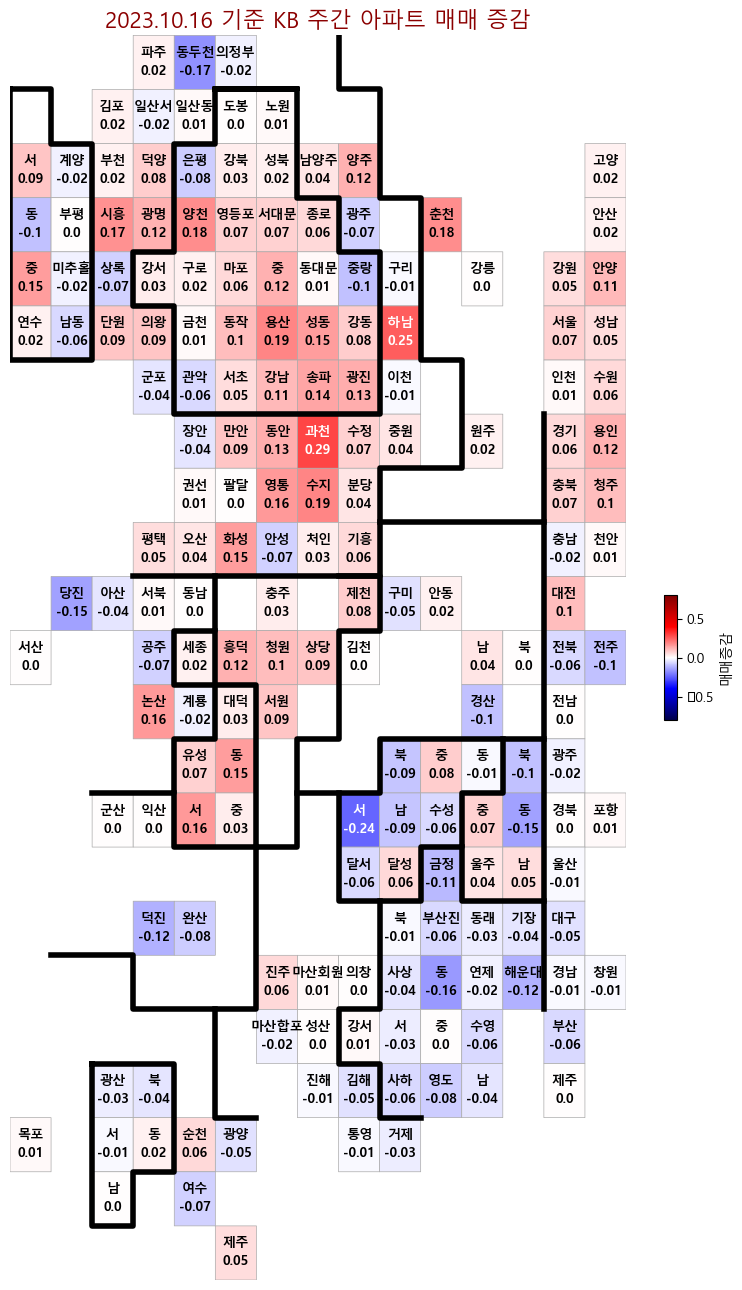

In [15]:
last_week = pd.to_datetime(str(mdf.index.values[-1])).strftime('%Y.%m.%d')
# zm_max, zm_min = 0.8, -0.8
drawKorea('매매증감', df, '광역시도', '행정구역', 'seismic', 'KB 주간 아파트 매매 증감', zm_max, zm_min) #seismic

C:\Users\user\AppData\Local\Temp\ipykernel_12600\3324612974.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


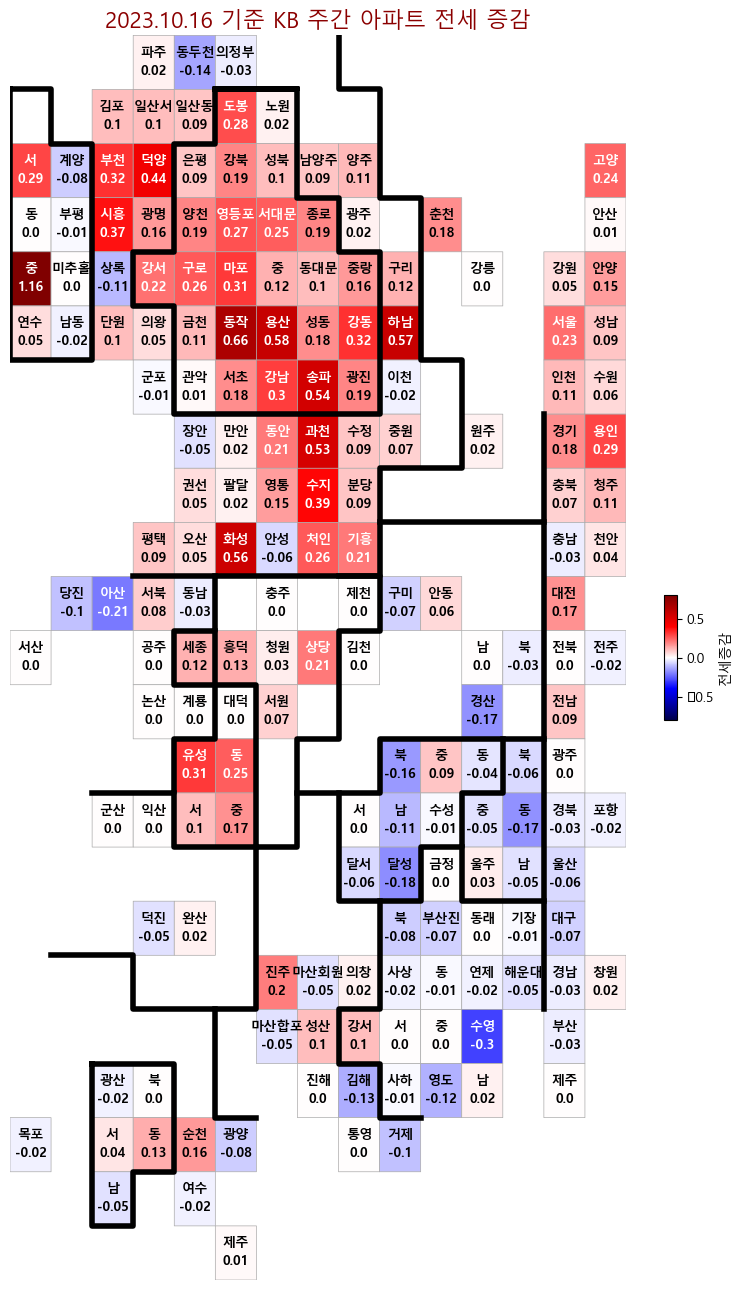

In [16]:
# zj_max, zj_min = 0.8, -0.8
drawKorea('전세증감', df, '광역시도', '행정구역', 'seismic', 'KB 주간 아파트 전세 증감', zj_max, zj_min) #Blues #bwr #

C:\Users\user\AppData\Local\Temp\ipykernel_12600\3324612974.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


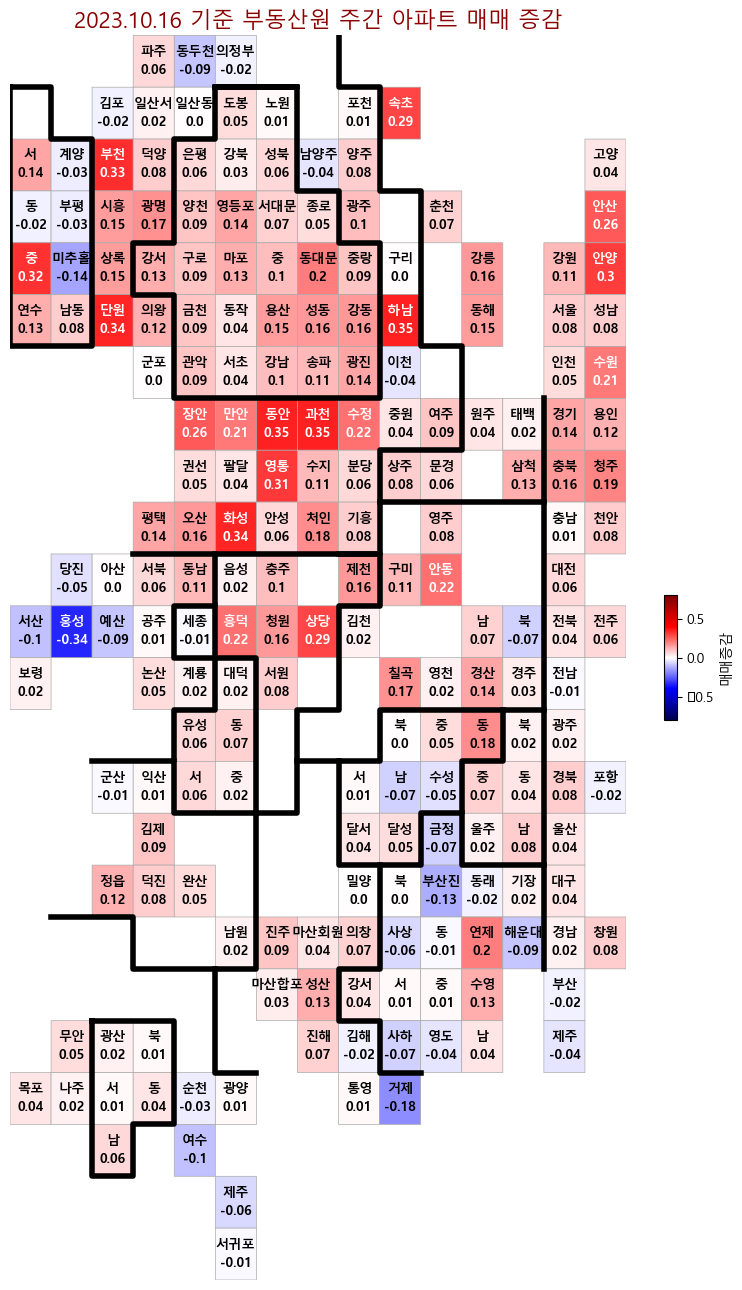

In [17]:
last_week = pd.to_datetime(str(omdf.index.values[-1])).strftime('%Y.%m.%d')
drawKorea('매매증감', odf, '광역시도', '행정구역', 'seismic', '부동산원 주간 아파트 매매 증감', zo_max, zo_min)

C:\Users\user\AppData\Local\Temp\ipykernel_12600\3324612974.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


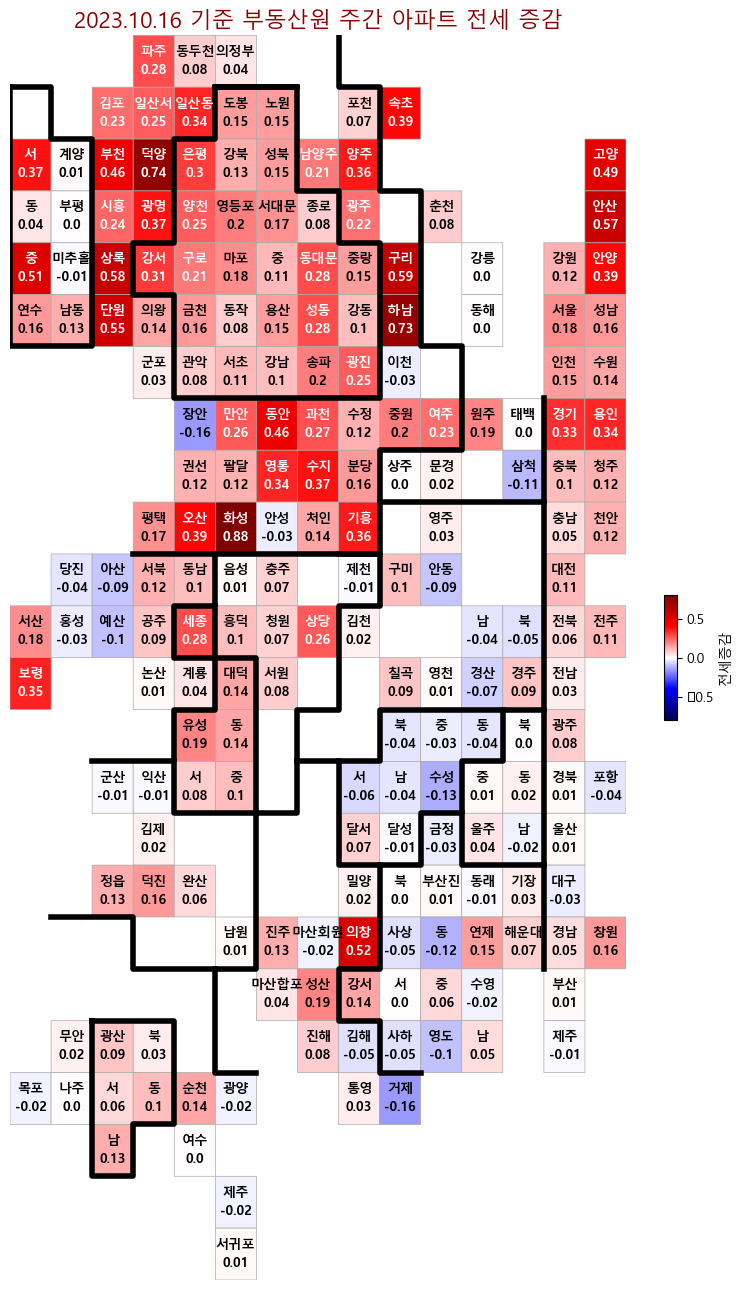

In [18]:
drawKorea('전세증감', odf, '광역시도', '행정구역', 'seismic', '부동산원 주간 아파트 전세 증감', zoj_max, zoj_min)